# PCA ADTK(ALL)

## Демо метода на небольшом отрезке данных

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/InControl/Anomaly_data/1group_2017_01-2017_04.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)
df

<ipython-input-1-7e2aa5d6ca4b>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('/content/drive/MyDrive/InControl/Anomaly_data/1group_2017_01-2017_04.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)


,20MBY10CE901_XQ01,20MBY00CS901_XQ01,20MBL11CT010_XQ01,20MBL11CM001_XQ01,20MBL10CP003_XQ01,20MBL10CP004_XQ01,20MBL10CP005_XQ01,20MBL10CP010_XQ01,20MBA11DG002_XQ01,20MBA11CP101_XQ01,20MBA11CT101A_XQ01,20MBA11CT102A_XQ01,20MBA11CT103A_XQ01,20MBA11CT111A_XQ01,20MBA12CT101B_XQ01,20MBA12CT102B_XQ01
timestamp,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,8.326673e-17,-0.405709,-0.173892,0.048161,0.232300,-0.055052,-0.076023,0.124137,-0.005792,-0.570368,-0.146919,-0.143310,-0.156391,-0.143149,-0.116031,-0.109107
2017-01-01 00:05:00,8.326673e-17,-0.405709,-0.173892,0.049146,0.228187,-0.055052,-0.084615,0.124137,-0.005792,-0.559324,-0.146919,-0.143310,-0.156391,-0.143149,-0.116031,-0.109107
2017-01-01 00:10:00,8.326673e-17,-0.405709,-0.174559,0.040777,0.220460,-0.082740,-0.084615,0.124137,-0.005792,-0.571842,-0.146919,-0.143310,-0.153543,-0.143149,-0.117659,-0.109107
2017-01-01 00:15:00,8.326673e-17,-0.405709,-0.174559,0.046623,0.229683,-0.035173,-0.084615,0.124137,-0.005792,-0.563006,-0.144010,-0.137521,-0.153543,-0.140254,-0.114403,-0.105784
2017-01-01 00:20:00,8.326673e-17,-0.405704,-0.175050,0.047970,0.237744,-0.034436,-0.083737,0.120433,-0.004301,-0.563195,-0.147464,-0.140959,-0.154085,-0.140791,-0.113770,-0.105129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-31 23:35:00,8.326673e-17,-0.405842,-0.317663,0.170804,0.255922,0.750581,0.603340,0.473256,-0.043481,-0.041337,-0.319291,-0.309011,-0.307913,-0.282986,-0.244380,-0.236970
2017-03-31 23:40:00,8.326673e-17,-0.405840,-0.318756,0.159163,0.262214,0.750792,0.615673,0.468538,-0.043056,-0.015619,-0.319447,-0.312061,-0.308067,-0.288929,-0.255596,-0.246750
2017-03-31 23:45:00,8.326673e-17,-0.405831,-0.315978,0.142298,0.267932,0.752055,0.617179,0.467893,-0.040501,-0.024779,-0.320381,-0.315887,-0.308995,-0.284061,-0.251255,-0.245628


In [5]:
!pip install adtk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<Axes: >]

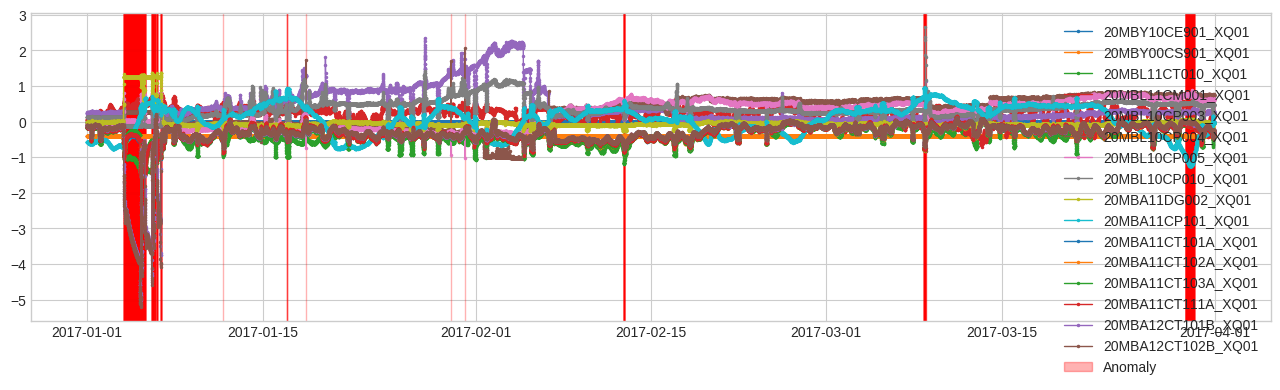

In [ ]:
from adtk.visualization import plot
from adtk.detector import PcaAD
pca_ad = PcaAD(k=2, c = 3)
anomalies = pca_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

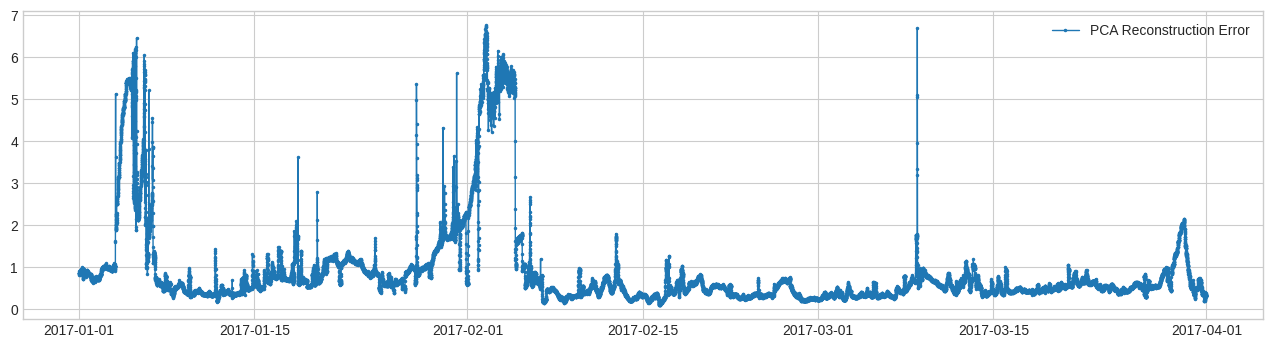

In [ ]:
from adtk.transformer import PcaReconstructionError
s = PcaReconstructionError(k=1).fit_transform(df).rename("PCA Reconstruction Error")
plot(s, ts_linewidth=1, ts_markersize=3, curve_group=["PCA Reconstruction Error"]);

In [ ]:
from adtk.transformer import PcaReconstructionError
s = PcaReconstructionError(k=1).fit_transform(df).rename("PCA Reconstruction Error")
plot(s, ts_linewidth=1, ts_markersize=3, curve_group=["PCA Reconstruction Error"]);

[<Axes: >]

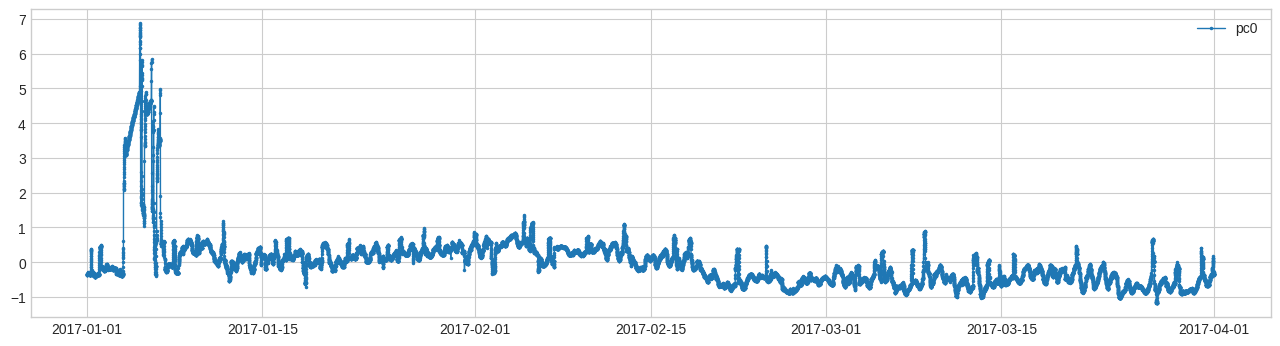

In [ ]:
from adtk.transformer import PcaProjection
s = PcaProjection(k=1).fit_transform(df)
plot(s, ts_linewidth=1, ts_markersize=3, curve_group=["pc0"])

## Прогон на всех данных

In [ ]:
pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
cd ./drive/MyDrive/InControl/

/content/drive/MyDrive/InControl


In [ ]:
import sqlite3
import pandas as pd
cnx = sqlite3.connect('/content/drive/MyDrive/InControl/YUGRES_all.sqlite')
print(cnx)
data = pd.read_sql_query("SELECT * FROM 'data'", cnx)
del data['index']
data.to_csv('data.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import os
import numpy as np

# cnx = sqlite3.connect('YUGRES_all.sqlite')
# print(cnx.cursor)
# test_df = pd.read_sql_query("SELECT * FROM 'data'", cnx, parse_dates=True,index_col = 'timestamp')
test_df = pd.read_csv('data.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)
test_df = test_df[test_df['20MBY10CE901_XQ01']>195]
# time_ = pd.to_datetime(test_df['timestamp'])
# # Создаем список названий столбцов, которые начинаются с "20"
selected_columns = [col for col in test_df.columns if col.startswith("20")]
# # Создаем новый DataFrame, содержащий только выбранные столбцы
df_selected_test = test_df[selected_columns]
# df_selected_test.index = time_

<ipython-input-3-4e1f92c1e301>:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test_df = pd.read_csv('data.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)


In [ ]:
from adtk.visualization import plot
from adtk.detector import PcaAD
# df = df_selected_test.squeeze('Index')
pca_ad = PcaAD(k=2, c = 3)
anomalies = pca_ad.fit_detect(df_selected_test)
plot(df_selected_test, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

In [23]:
from adtk.transformer import PcaReconstructionError
s = PcaReconstructionError(k=1).fit_transform(df_selected_test).rename("PCA Reconstruction Error")


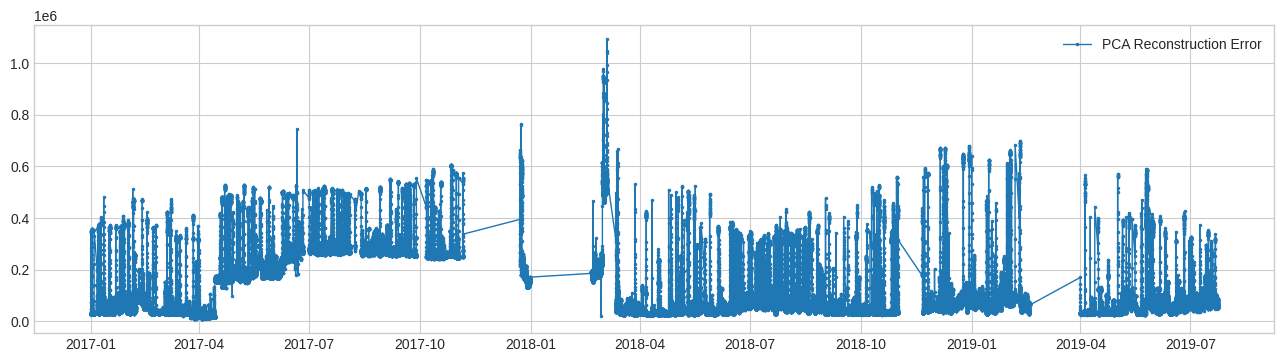

In [8]:
from adtk.visualization import plot
plot(s, ts_linewidth=1, ts_markersize=3, curve_group=["PCA Reconstruction Error"]);

In [25]:
import scipy
def scaler_loss(target_value, scaler_name, range_loss = 100):
            if scaler_name == 'cdf':
                hist = np.histogram(target_value, bins=range_loss)
                # logger.debug(target_value)
                scaler_loss = scipy.stats.rv_histogram(hist)
                # logger.debug(hist)
                target_value = scaler_loss.cdf(target_value)*range_loss
                scaler_loss = hist
            elif scaler_name == 'minmax':
                scaler_loss = MinMaxScaler(feature_range=(0, range_loss))
                loss_2d = np.reshape(target_value, (-1,1))
                scaler_loss.fit(loss_2d)
                target_value = scaler_loss.transform(loss_2d)
            return target_value, scaler_loss

In [12]:
loss = scaler_loss(s,'cdf')

In [26]:
df_loss = pd.DataFrame()
df_loss['loss'] = s
target_value, scaler_loss = scaler_loss(df_loss['loss'],'cdf')
print(target_value)



[10.24911824 10.47633052 10.59254035 ... 35.3849669  34.42547505
 34.25195782]


NameError: ignored

In [33]:
df_target = pd.DataFrame()
df_target['target_value'] = target_value
df_target.index = df_selected_test.index
print(df_target)
df_target.to_csv('pca.csv')

                     target_value
timestamp                        
2017-01-01 00:00:00     10.249118
2017-01-01 00:05:00     10.476331
2017-01-01 00:10:00     10.592540
2017-01-01 00:15:00     10.308403
2017-01-01 00:20:00     10.310418
...                           ...
2019-07-23 20:40:00     35.349225
2019-07-23 20:45:00     35.936921
2019-07-23 20:50:00     35.384967
2019-07-23 20:55:00     34.425475
2019-07-23 21:00:00     34.251958

[204186 rows x 1 columns]


In [34]:
df = pd.read_csv('pca.csv')

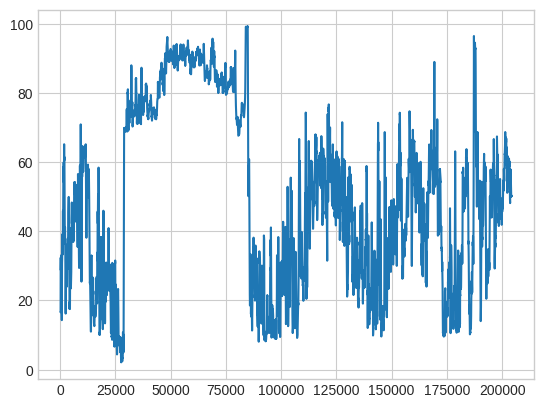

In [54]:
window_size = 254
df['target_mean'] = df['target_value'].rolling(window=window_size).mean()
plt.plot(df['target_mean'])

In [45]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [46]:
import pandas as pd

data_to_remove = {
    'Начало': ['2017-01-13 16:05:00', '2017-01-24 13:35:00', '2017-12-22 00:00:00',
               '2017-12-22 00:00:00', '2017-03-05 00:00:00', '2017-03-03 00:00:00',
               '2017-12-22 18:10:00', '2019-05-25 01:10:00', '2017-07-06 00:00:00',
               '2019-05-26 00:00:00', '2017-03-03 00:00:00'],
    'Конец': ['2017-01-21 08:50:00', '2017-02-06 05:00:00', '2018-02-19 00:00:00',
             '2017-12-22 23:55:00', '2017-03-05 23:55:00', '2017-03-03 23:55:00',
             '2018-02-20 20:55:00', '2019-05-28 14:45:00', '2017-07-06 23:55:00',
             '2019-05-26 23:55:00', '2017-03-03 23:55:00']
}

# Преобразуем даты в формат Timestamp
date_tuples = [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in zip(data_to_remove['Начало'], data_to_remove['Конец'])]

print(date_tuples)

[(Timestamp('2017-01-13 16:05:00'), Timestamp('2017-01-21 08:50:00')), (Timestamp('2017-01-24 13:35:00'), Timestamp('2017-02-06 05:00:00')), (Timestamp('2017-12-22 00:00:00'), Timestamp('2018-02-19 00:00:00')), (Timestamp('2017-12-22 00:00:00'), Timestamp('2017-12-22 23:55:00')), (Timestamp('2017-03-05 00:00:00'), Timestamp('2017-03-05 23:55:00')), (Timestamp('2017-03-03 00:00:00'), Timestamp('2017-03-03 23:55:00')), (Timestamp('2017-12-22 18:10:00'), Timestamp('2018-02-20 20:55:00')), (Timestamp('2019-05-25 01:10:00'), Timestamp('2019-05-28 14:45:00')), (Timestamp('2017-07-06 00:00:00'), Timestamp('2017-07-06 23:55:00')), (Timestamp('2019-05-26 00:00:00'), Timestamp('2019-05-26 23:55:00')), (Timestamp('2017-03-03 00:00:00'), Timestamp('2017-03-03 23:55:00'))]


In [55]:
import numpy as np
import pandas as pd

# Замените 'df' на вашу собственную переменную DataFrame
# и 'timestamp' на имя столбца с временными метками,
# 'value' на имя столбца со значениями

# Рассчитываем порог
short_threshold = np.percentile(df['target_value'], 80)

# Создаем список, чтобы хранить интервалы
intervals = []

# Инициализируем переменные для текущего интервала
current_interval_start = None
current_interval_end = None

# Проходимся по всем строкам DataFrame
for index, row in df.iterrows():
    timestamp = row['timestamp']  # Предполагается, что столбец 'timestamp' содержит временные метки
    # Если значение выше порога, начинаем новый интервал
    if row['target_mean'] > short_threshold:
        if current_interval_start is None:
            current_interval_start = timestamp
        current_interval_end = timestamp
    else:
        # Если значение ниже порога, закрываем текущий интервал
        if current_interval_start is not None:
            # Проверяем длительность интервала
            if current_interval_end - current_interval_start > pd.Timedelta(seconds=600):
                intervals.append((current_interval_start, current_interval_end))
            # Сбрасываем переменные текущего интервала
            current_interval_start = None
            current_interval_end = None

# Проверяем последний интервал после завершения цикла
if current_interval_start is not None:
    if current_interval_end - current_interval_start > pd.Timedelta(seconds=600):
        intervals.append((current_interval_start, current_interval_end))


                 timestamp  target_value  target_mean
30560  2017-04-20 03:45:00     77.835002    79.989715
30561  2017-04-20 03:50:00     74.955695    80.012554
30562  2017-04-20 03:55:00     70.704397    80.018663
30563  2017-04-20 04:00:00     68.227459    80.014815
30564  2017-04-20 04:05:00     67.780681    80.009187
...                    ...           ...          ...
188045 2019-05-28 17:45:00     50.275745    80.712303
188046 2019-05-28 17:50:00     50.004519    80.533285
188047 2019-05-28 17:55:00     49.711480    80.352973
188048 2019-05-28 18:00:00     48.800115    80.169192
188049 2019-05-28 18:05:00     47.222627    79.978766

[38181 rows x 3 columns]
                timestamp  target_value  target_mean
2772  2017-01-13 16:05:00     31.304154    30.572847
2773  2017-01-13 16:10:00     29.977131    30.634688
2774  2017-01-13 16:15:00     30.998436    30.699792
2775  2017-01-13 16:20:00     32.809616    30.772156
2776  2017-01-13 16:25:00     35.598225    30.855858
...     

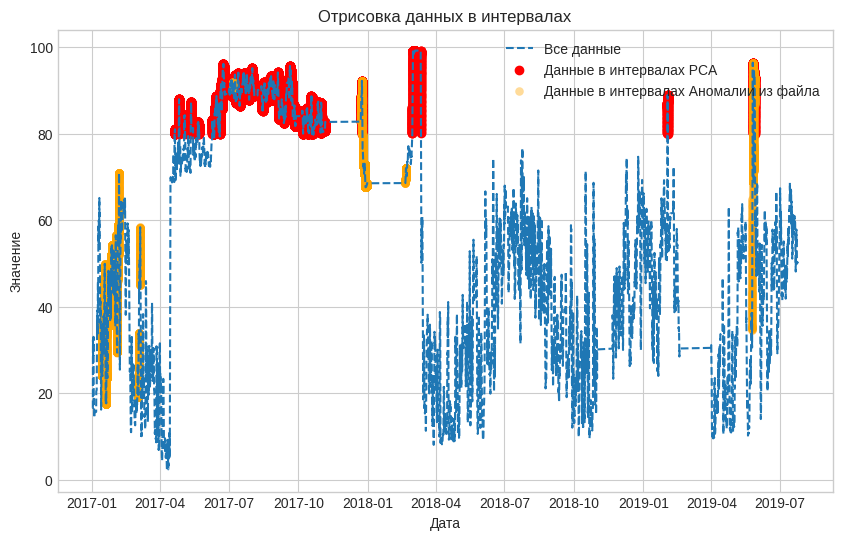

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


df['timestamp'] = pd.to_datetime(df['timestamp'])
# Определите интервалы
intervals = intervals
intervals_an = date_tuples

# Фильтруем DataFrame, чтобы получить только строки, которые находятся в интервалах
filtered_df = pd.DataFrame()
filtered_df_an = pd.DataFrame()

for interval in intervals:
    start_date, end_date = interval
    mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
    interval_df = df.loc[mask]
    filtered_df = pd.concat([filtered_df, interval_df])
print(filtered_df)
for interval in intervals_an:
    start_date, end_date = interval
    mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
    interval_df = df.loc[mask]
    filtered_df_an = pd.concat([filtered_df_an, interval_df])
print(filtered_df_an)

# Отрисовываем полученные данные
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['target_mean'], label='Все данные', linestyle='--')
plt.scatter(filtered_df['timestamp'], filtered_df['target_mean'], color='red', label='Данные в интервалах PCA')
plt.scatter(filtered_df_an['timestamp'], filtered_df_an['target_mean'], color='orange', label='Данные в интервалах Аномалии из файла', alpha = 0.4,linewidths=0.1)
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.title('Отрисовка данных в интервалах')
plt.grid(True)
plt.show()